### To install jupyter extensions:
* Extensions are like add-ons can make your work on notebooks significantly easier. Follow the steps in below link.
* https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator
* Hit Tab after . to see all the functions like np. TAB
* Hit Shift+Tab after ( opening bracket to see function definition. Like pd.read_csv(  SHIFT+TAB

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sbs

from scipy.spatial import distance
from sklearn import datasets, tree
from sklearn.preprocessing import StandardScaler, scale
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, adjusted_rand_score, mean_squared_error
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

In [4]:
# lets use the Titanic dataset where ever applicable 
tnic_df = pd.read_csv('data/titanic_kaggle_dataset.csv', header=0, dtype={'Age':np.float64})
tnic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Engineering
1. Feature engineering is the addition and construction of additional variables, or features, to your dataset to improve machine learning model performance and accuracy. The most effective feature engineering is based on sound knowledge of the business problem and your available data sources.
2. Creating new features gives you a deeper understanding of your data and results in more valuable insights. When done correctly, feature engineering is one of the most valuable techniques of data science, but it is also one of the most challenging.
3. The feature engineering process is:
    * Brainstorming or testing features;
    * Deciding what features to create;
    * Creating features;
    * Checking how the features work with your model;
    * Improving your features if needed;
    * Go back to brainstorming/creating more features until the work is done.

### Evaluation Metrics for different MI algorithms
1. Accuracy scores cannot be used for regression, its is basically meant for classification. We have 'Mean Squared Error' for regression.
2. Reference
    * https://scikit-learn.org/stable/modules/model_evaluation.html
    * https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

### sklearn Preprocessing data
* https://scikit-learn.org/stable/modules/preprocessing.html
* __Standardization__ of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
* For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might __dominate__ the objective function and make the estimator unable to learn from other features correctly as expected.

### sklearn.preprocessing.scale
* sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True) --> This will __Standardize__ (Mean = 0 and unit variance) a dataset along any axis
* The function scale provides a quick and easy way to perform this operation on a single array-like dataset

In [5]:
Sample_train = np.array([[1,2,3],[4,5,6],[1,2,3]])
Sample_scale = scale(Sample_train)
print(Sample_scale.mean(axis = 0))
print(Sample_scale.std(axis = 0))

[0. 0. 0.]
[1. 1. 1.]


### sklearn.preprocessing.StandardScaler
* sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True) --> Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform..
* This class has the following methods:  
<img src="images/image5.png" align="middle" style="width:400px; height:200px" />  
* Difference between scale and standardScaler
    Those are doing exactly the same, but:
    preprocessing.scale(x) is just a function, which transforms some data
    preprocessing.StandardScaler() is a class supporting the Transformer API
    I would always use the latter, even if i would not need inverse_transform and co. supported by StandardScaler().

In [6]:
sample_train = np.array([[1,2,3],[4,5,6],[1,2,3]])
sample_test = np.array([[1,1,1],[2,2,2],[3,3,3]])
print(sample_train)
print(sample_test)

[[1 2 3]
 [4 5 6]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [7]:
my_scaler = StandardScaler()
my_scaler.fit(Sample_train) # Computes the mean and std deviation and stores in its class attributes
scaled_train = my_scaler.transform(Sample_train)# Perform Standardization using fit data stored
#my_scaler.fit_transform(Sample_train) # first fit (computes and stores), then apply to sample_train 
scaled_test = my_scaler.transform(sample_test) # apply the same standardization to testing data
print(scaled_train)
print("*** train mean - ", scaled_train.mean(axis=0))
print("*** train std - ", scaled_train.std(axis=0))
print(scaled_test)
print("*** test mean - ", scaled_test.mean(axis=0)) # won't be 0 as we are using mean is from train data
print("*** test std - ", scaled_test.std(axis=0))

[[-0.70710678 -0.70710678 -0.70710678]
 [ 1.41421356  1.41421356  1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]]
*** train mean -  [0. 0. 0.]
*** train std -  [1. 1. 1.]
[[-0.70710678 -1.41421356 -2.12132034]
 [ 0.         -0.70710678 -1.41421356]
 [ 0.70710678  0.         -0.70710678]]
*** test mean -  [ 0.         -0.70710678 -1.41421356]
*** test std -  [0.57735027 0.57735027 0.57735027]


In [8]:
rescaled_train = my_scaler.inverse_transform(scaled_train)
rescaled_test = my_scaler.inverse_transform(scaled_test)
print(rescaled_train)
print(rescaled_test)

[[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


# Decision Tree

1. Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving __regression__ and __classification__ problems too.
2. Decision trees are most commonly used. It is one of the few classifier algorithms that is easy to interpret and analyze. We actually know how it works and how it classifies a given data.
3. Decision trees use the features( columns) that you provide to build the tree and make the best prediction. So it's important that you choose your features that you feed the decision tree precisely.

#### Reference:
1. https://www.youtube.com/watch?v=tNa99PG8hR8&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=2
2. John Gordon - https://www.youtube.com/watch?v=eKD5gxPPeY0
3. __*IMP* must listen__ John Gordon - https://www.youtube.com/watch?v=LDRbO9a6XPU&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=8
4. https://scikit-learn.org/stable/modules/tree.html

 ### Important Terminology: 
1. __Root Node__: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
2. __Leaf / Terminal Node__: Nodes do not split is called Leaf or Terminal node.
3. __Pruning__: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
4. __Branch / Sub-Tree__: A subsection of the entire tree is called branch or sub-tree.
5. __Decision/Internal Node__: When a sub-node splits into further sub-nodes, then it is called the decision node.
6. The root and the decision/internal node have test conditions.

<img src="images/image1.png" style="width:400px; height:200px; float:left"/>

1. https://en.wikipedia.org/wiki/Decision_tree_learning

2. __Gini Impurity__ : 
    * https://www.youtube.com/watch?v=LDRbO9a6XPU&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=8
    * Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.
    * It reaches its minimum (zero) when all cases in the node fall into a single target category.
    * Gini Impurity : Calculated as         
                            j                         j
                    G(k) =  Σ P(i) * (1 - P(i)) = 1 - Σ P(i)^2
                            i=1                       i=1
      
    * Gini Gain = Information Gain: (GI of Total dataset) - (Sum of weighted GI of each branch)
    This will give us how much impurity will be reduced with this split and tell the decision tree to split on specific feature first.
<img src="images/image11.png" align="middle" style="width:350px; height:180px"/>
<img src="images/image12.png" align="middle" style="width:350px; height:50px"/>
3. https://victorzhou.com/blog/gini-impurity/ --> This will explain how to calculate Gini Impurity and Gini Gain and how it is used to make a split in decision tree. Also read about Information gain.

### Basic Usage 

In [9]:
#Apple and Orange classification. Oranges are bumpy and heavier. 
#training_data = [[140, "smooth"], [170, "bumpy"], [135, "smooth"], [155, "bumpy"], [165, "bumpy"]] 
#labels = ["apple", "orange", "apple", "orange", "orange"]
training_data = [[140, 0], [170, 1], [135, 0], [155, 1], [165, 1]]
labels = [2, 3, 2, 3, 3]

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_data, labels)

In [11]:
clf.predict([[135, 0]])  # answer is 2 as its smooth and light weight so it's apple

array([2])

### Plot a decision tree
__sklearn.tree.plot_tree__ for the above example we can use tree.plot_tree(clf) to get the decision tree visualisation.

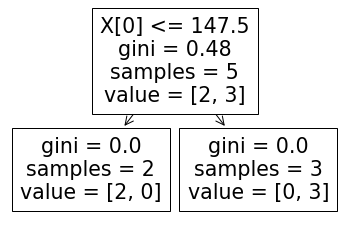

In [12]:
tree.plot_tree(clf);  # ; will remove the text from output cell.

### Decision Tree Classifier from Scratch

##### Classifier can be thought as a function y=f(x) with y being target output/label and f(x) as our features.
<img src="images/image2.png" style="width:150px; height:100px; float:left"/>

In [13]:
#sklearn provide some datasets to work with, one of which is iris
iris = datasets.load_iris() #iris is a dict with keys as 'data', 'target', 'feature_name' etc
#iris

In [14]:
#use train_test_split to partition the data into training and testing group.
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # split 50-50 between test and train data

Its pretty easy to switch between different classifier as shown below. 90% of the code flow remains the same.

In [15]:

clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
#clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train);

In [16]:
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.9466666666666667

## k-nearest neighbors classifier algorithm
A powerful Supervised machine learning algorithm used for classification and regression (mostly classification). KNN is based on __feature similarity__. It classifies a data point based on how its neighbors are classified.
* Algorithm : 
    * As the name suggest the KNN first studies the training data. 
    * The for each new test data (a row in iris data set), it will try to find the nearest neighbour( a row in iris training data set) using euclidean distance. 
    * The nearest neighbour label is assigned to the test data set.
    * If two nearest neighour have the same distance, then the k value is used to get a voting.

* _k_ in the KNN is a parameter that refers to the number of nearest neighbors to include in the majority voting process. It uses EUCLIDEAN distance to find the nearest neighbor.
* Choosing a right value of _k_ is a process called as __parameter tuning__, and is important for better accuracy.  
<img src="images/image3.png" align = "middle" style="width:400px; height:200px;"/>   
* Choose th evalue of _k_:
    * __sqrt(n)__ where n is the total number of data points
    * after sqrt(n) if the number of feature are even make the _k_ odd and vise-versa
* When to use KNN:
    * For classification
    * Data is labeled.
    * Data is noise free 
    * Dataset is small 
<img src="images/image4.png" align = "middle" style="width:400px; height:200px;"/>


__Pros__:
* KNN is a __non-parametric__. When we say a technique is non-parametric , it means that it does not make any assumptions on the underlying data distribution.

__Cons__:
* Its a __lazy__ algorithm. To be more exact, all (or most) the training data is needed during the testing phase.Basically the KNN iterate over every training set data to make a new test prediction.
* If your _k_ is too __low__, your predict is not that accurate. If _k_ is too __high__ then its gonna take for ever to process and you are gonna run into processing/resource issues.

## K-NN classifier from scratch with k=1:
reference: https://www.youtube.com/watch?v=AoeEHqVSNOw&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=5

In [17]:
class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return np.array(predictions)
    
    def closest(self, row):
        #from scipy.spatial import distance to calculate the euclidean distance
        best_dist = distance.euclidean(row, self.X_train[0])  
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = distance.euclidean(row, self.X_train[i])
            if  dist < best_dist:
                best_dist = dist
                best_index = i   
        return self.y_train[best_index]

In [18]:
a=[1,1,1,1]
b=[2,2,2,2]
c=[2,3,4,5]
distance.euclidean(b,c)

3.7416573867739413

In [19]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = ScrappyKNN()
clf.fit(X_train, y_train);
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.96

In [20]:
confusion_matrix(y_test, predictions)

array([[21,  0,  0],
       [ 0, 25,  1],
       [ 0,  2, 26]], dtype=int64)

### Classification Accuracy and its Limitations
* Classification accuracy is the ratio of correct predictions to total predictions made.
    classification accuracy = correct predictions / total predictions * 100
* Classification accuracy can also easily be turned into a misclassification rate or error rate by inverting the value, such as: error rate = (1 - (correct predictions / total predictions)) * 100
* The main problem with classification accuracy is that it hides the detail you need to better understand the performance of your classification model. There are two examples where you are most likely to encounter this problem:
    1. When your data has more than 2 classes. With 3 or more classes you may get a classification accuracy of 80%, but you don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model.
    2. When your data does not have an even number of classes. You may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and you can achieve this score by always predicting the most common class value. 
* Classification accuracy can hide the detail you need to diagnose the performance of your model. But thankfully we can tease apart this detail by using a confusion matrix.

### Confusion Matrix: 
* A confusion matrix is a technique for summarizing the performance of a classification algorithm.
* The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
<img src="images/image6.png" align = "middle" style="width:200px; height:120px;"/>
* True Positive (TP) : these are the events that were correctly predicted by the model as "occurred = Yes."
* True Nagative (TN) : These are the events that were correctly predicted by the model as "occurred = No."
* False Positive (FP) : These are the events that were predicted as "occurred = Yes," but in reality, it was "occurred = No." __eqv. to false alarm, Type I error__
* False Negative (FN) : This is the opposite of FP, i.e. predicted as "occurred = No," but in reality, it was "occurred = Yes." __eqv. to miss, Type II error__

#### Reference:
1. https://en.wikipedia.org/wiki/Confusion_matrix --> Check this for all the calcualtion
2. https://www.youtube.com/watch?v=vP06aMoz4v8 --> Josh Starmer
3. https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c 


1. __sensitivity/ recall/ hit rate/ true pos rate (TPR)__: 
\begin{equation*}
TPR = \frac{TP}{TP + FN} = 1 - FNR
\end{equation*}
<img src="images/image7.png" align = "middle" style="width:300px; height:200px;"/>
2. __specificity, selectivity or true negative rate (TNR)__:
\begin{equation*}
TNR = \frac{TN}{TN + FP} = 1 - FPR
\end{equation*}
<img src="images/image8.png" align = "middle" style="width:300px; height:200px;"/>

Check the above video to calculate sensitivity and specificity of a model with more than 2 predicting value.

3.precision : 
\begin{equation*}
TPR = \frac{TP}{TP + FP}
\end{equation*}

* __Practical application of sensitivity and specificity__ : If we calculate the sensistivity and specficity for two ML models say Random forest and Logistic Regression and here are the numbers.
LR: Sensi: 0.81 and Speci: 0.85
RF: Sensi: 0.83 and Speci: 0.82
A high Sensitivity in RF tell us that the RF can predict the True Positive slightly higher than the LR. So RF is better at predicting people with Heart Desease. So use the RF model if its more important for you to know which patient is going to have a heart disease.
A high Specificity in LR tells us that the LR can predict the True Negative slightly higher than the RF. So use the LR model if its more important for you to know which patient is not going to have a heart disease.
<img src="images/image9.png" align = "left" style="width:200px; height:300px;"/>
<img src="images/image10.png" align = "middle" style="width:200px; height:300px;"/>

## Cluster Analysis : An unsupervised ML 
1. The goal of Cluster Analysis is to organise similar items in your data set into groups or clusters.
2. Ex application : In a retail industry segment/cluster your customer base into groups/clusters based on their purchase history. Grouping latest news articles into topics of the day, to itendify the trending topic of the day.
3. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.
4. Eucledean Distance / Manhattan Distance or Cosine Similarity is used in Clustering Algorithm to measure similarity between data points. 
5. Since clustering is a unsupervised learning technique (there is no labelled data), there is no "correct" clustering data. we are just trying to get the best clustering possible. Also clustering can result into numerous groups/clusters without a label. It requires further interpretation and analysis of the cluster we can come with some labels to the cluster and make use of this data.


### K-Means Clustering Algorithm
1. A very important question to ask yourself before starting clustering is, What are you trying to cluster and on waht bases. You should the question you are trying to answer.
1. Steps in K-Means Algorithm:  https://en.wikipedia.org/wiki/K-means_clustering  
    a. To begin, we first select a number of classes/groups(_k_) to use and randomly initialize their respective centroids.  
    b. Assign each sample to the closest centroid using Eucledian distance  
    c. Calculate mean of cluster which will be your new centroid.  
    d. Repeat (b) and (c) until stopping criteria is reached.  
<img src="images/image13.png" align = "middle" style="width:600px; height:300px;"/>
2. How to select Initial Centroid: Lots of sophesticated methods are there, one of the easy method is below.  
    a. __Issue__: Final Cluster are sensitive to Initial centroids selected.  
    b. __Solution__: Run k-means multiple times with different initial centroid and choose the best results.
3. __Evaluating Cluster Results__: error = distance between sample and centroid
squared error of all the samples and all the cluster gives us what is called as __WSSE (Within-cluster Sum of Squared Error)__
    So __WSSE 1 < WSSE2__, the clsutering with smaller error is better and can be used for further processing.
    Note: Larger values of _k_ always reduces the WSSE. So while comparing WSSE of two things we will need to maka sure we are using same _k_  
    <img src="images/image14.png" align = "middle" style="width:400px; height:300px;"/>
4. __Choosing the value of _k___: There are different techniques to determine the vaue of _k_, some of which are  
    a. __Visualization__: Visualize the dataset and see if we can fidn some natural grouping of the sample data based on domain knowledge. We can use scattered plots and dimensionality reduction here to visualize the data 
    b. __Application -depedant__: sometimes ot depends on applicatipn and domain knowledge.  
    c. __Elbow Method__: 
    <img src="images/image15.png" align = "middle" style="width:400px; height:300px;"/>

### Building and running the Clustering Model with iris dataset

In [21]:
iris = datasets.load_iris()
#X = scale(iris.data) # with just scale we don't get a inverse_scale() method.
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)
y = pd.DataFrame(iris.target) 
# y.columns = ['Target']

In [22]:
# we know iris dataset has 3 different flowers info so k=3
# random_state - Determines random number generation for centroid initialization. 
# Use an int to make the randomness deterministic
kmeans = KMeans(n_clusters=3, random_state=5) 
kmeans.fit(X); # computes KMeans clustering
kmeans.labels_# predicted labels of each data point
#kmeans.cluster_centers_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [23]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[5.80188679, 2.67358491, 4.36981132, 1.41320755],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.78085106, 3.09574468, 5.5106383 , 1.97234043]])

#### Plotting the model outputs

In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4  # this parameter is used to resie your figure

In [25]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = [i.split(' (cm)')[0] for i in iris.feature_names]
iris_df.columns 

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [26]:
# explanation of what is happening at c=color_theme[iris.target]
a=np.array(['a', 'b'])
b=np.array([0,1,0,0,1]) #'b' holds the indexes of elements
a[b] # selecting your elements from a using b

array(['a', 'b', 'a', 'a', 'b'], dtype='<U1')

Text(0.5, 1.0, 'K-Means Clustering')

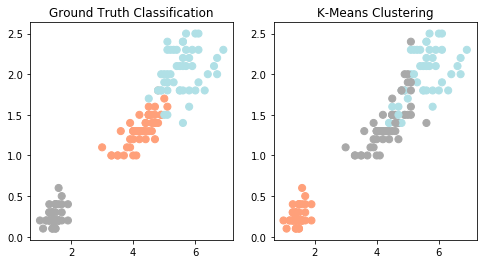

In [27]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)  # creates a subplot with rows=1,cols=2,index=1 selected
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[kmeans.labels_], s=50)
plt.title("K-Means Clustering")


In [28]:
# with np.choose(a, choices) we are creating a array with elements from 'choices' choosen/sequenced with index from 'a'.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.choose.html
#choices = [[0, 1, 2, 3], [10, 11, 12, 13],[20, 21, 22, 23], [30, 31, 32, 33]]
choices = [6,7,8]
correction_index = [2,1,0,0,1,2] # the index should not exceed the number of elements in choices.
np.choose(correction_index, choices)

array([8, 7, 6, 6, 7, 8])

Text(0.5, 1.0, 'K-Means Clustering')

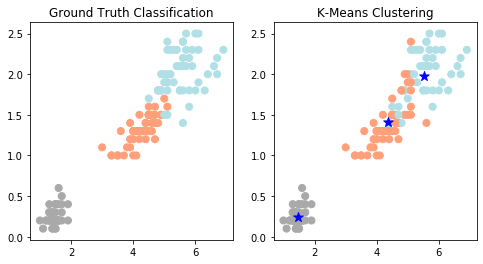

In [29]:
# here we will relabel the predicted labels_ to correct the coloring
#[0,1,2] --> Original label per iris dataset which stands for setosa(0), versicolor(1), verginica(2)
#[1,0,2] --> Predicted labels per kmeans setosa(1), versicolor(0), verginica(2)
relabel = np.choose(kmeans.labels_,[1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length'], y=iris_df['petal width'], c=color_theme[relabel], s=50)
#plot the scaled centroids for our reference.
plt.scatter(x=centroids[:,2], y=centroids[:,3], c='b', s=100, marker='*' )
plt.title("K-Means Clustering")

In [30]:
# now that kmeans has learnt the clustering, lets try to predict a new data.
test_df = pd.DataFrame([
    [5.1,3.5,1.4,0.2], # this is setosa(predicted code 1)
    [7.0,3.2,4.7,1.4], # this is versicolor(predicted code 0)
    [5.9,3.0,5.1,1.8], # this is a virginica( predected code 2)
    [5.4,3.9,1.3,0.4], # setosa(predicted code 1)
    [5.5,2.3,4.0,1.3], # versicolor(predicted code 0)
    [6.2,3.4,5.4,2.3], # virginica( predected code 2)
])
test_df = scaler.transform(test_df)
kmeans.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [31]:
#as you see setosa is correctly predeicted 100% times but sometimes versicolor and virginica are not predicted correctly.
kmeans.predict(test_df)

array([1, 2, 0, 1, 0, 2], dtype=int32)

In [32]:
kmeans.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

### Clustering performance evaluation - https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
1. __from sklearn import metrics__
1. Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.
2. __Adjusted Rand Index__: Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization:
    * see below code
    * Perfect labeling is scored 1.0
    * Bad labeling can be 0.0 or negative

In [33]:
#label_true = [0,0,0,1,1,1]  
#label_pred = [1,1,1,0,0,0] # sequence of clustering labels doesn't matter
label_true = [0,0,0,1,1,1]  
label_pred = [2,2,0,3,3,3] # we can premute the labels, we can leave it normalised.
#label_true = [0,0,0,1,1,1]  
#label_pred = [1,2,5,4,2,3] # score as negative
print(metrics.adjusted_rand_score(label_true, label_pred))
print(metrics.adjusted_rand_score(label_pred, label_true)) # this gives the same score as above, arguments are symmetric

0.7058823529411765
0.7058823529411765


In [34]:
label_true = y[0].tolist()
label_pred = kmeans.labels_ # using relabel gives the same result

metrics.adjusted_rand_score(label_true, label_pred) #Ground truth is known
metrics.silhouette_score(X, kmeans.labels_, metric='euclidean') #Ground truth is not known

0.45994823920518635

In [35]:
# we shouldn't be using classification report here as we know we are not performing classification we are doing clustering. 
#Just because we have used a classification example we can use it just for reference to above clustering score.
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Bias and Variance and tradeoff 
We know that in ML we are trying to predict the function f(), given y and X.Here we are trying to predict the function f^() as close as possible to the __"Ground truth"__(true) function f().
1. __Bias__ : Is the error between our model predicted function __f^()__ to the ground truth function __f()__. See the picture below. Say we ahve a 'Ground true' function which is a arc and we are using a liner regression to predict the curved function. Here no matter what, the liner regression is going to give us a straight line. This kind of modelling where the model misses the little attentions to training data and over generalise the algorithm are said to have __high Bias__ and are called as __underfitted__ in training phase. 
<img src="images/image17.png" align = "middle" style="width:300px; height:200px;"/>
2. __Variance__ : On the other hand if we are using a polynomial regression, it is super flexible and hugs the training set along the arc of the true function. Here the polynomial regression pays lots of attention to the training data and does not generalise well on data which it hasn't seen before. As a result, such model perform very well on training data but have high error rates on test data. This is called as __high variance__ situation. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs. This kind of model is said to be __overfitted__ in training phase.
<img src="images/image18.png" align = "middle" style="width:300px; height:200px;"/> 
3. The fact here is Liner regression which has __high bias__, will have __low variance__ due to generalisation during training phase. And polynomial regression will have __low bias__ in training phase, but will have __high variance in__ testing phase.
4. Another fact is its not possible to have a ideal model which will have low bais and low variance. Hence there has to be a __trade-off__ between the two. An __optimal balance of bias and variance would never overfit or underfit the model__. To build a good model, we need to find a good balance between bias and variance such that it minimizes the total error.
                __Total Error = Bias^2+Variance+Irreducible Error__  
<img src="images/image16.png" align = "middle" style="width:200px; height:200px;"/> 
5. These Bias and Variance is seen mainly in predictive modelling of Supervised Learning Algorithm namely Classification and Regression.
 
6. Reference:
    * Mitesh Khapra - https://www.youtube.com/watch?v=Y0m136XU65o
    * Josh Stamer - https://www.youtube.com/watch?v=Y0m136XU65o
    * https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

## Cross-Validation - https://scikit-learn.org/stable/modules/cross_validation.html
1. If we want to know which machine learning algorithm out of N available algorithms to use to solve the problem, we can use cross-validation.
2. __Cross validation__ allows us to compare different machine learning methods and get a sense of how well they will work in practice.

1. __train_test_split__ - This is the simplest way to split the dataset. But problem with it is that since we split it randomly it may happen that the training data get overly saturated with one type of data and the model may have poor performance on test data.

3. __K-Fold CV__: In k-fold cross-validation, you split the training data into k subsets of data (also known as folds). You train an ML model on all but one (k-1) of the subsets, and then evaluate the model on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time. Then the accuracy is averaged out.
    * The __dis-advantages__ with this is that, what if one type of data overload in test/training fold. Then the accuracy of overall model will fall.  
<img src="images/image19.png" align = "middle" style="width:600px; height:150px;"/> 
4. __Stratified K-fold CV__: In some cases, there may be a large imbalance in the response variables. For example, in dataset concerning price of houses, there might be large number of houses having high price. Or in case of classification, there might be several times more negative samples than positive samples. For such problems, a slight variation in the K Fold cross validation technique is made, such that each fold contains approximately the same percentage of samples of each target class as the complete set, or in case of prediction problems, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold. Another major difference between KFold and SKFold is that in stratified you need to supply both X and y labels to teh .split(), bacause Stratifying is done on the y lables. Where as in KFold just X si enough.
5. __Time Series CV__: Splitting a time-series dataset randomly does not work because the time section of your data will be messed up. For a time series forecasting problem, we perform cross validation in the following manner.
<img src="images/image20.png" align = "middle" style="width:600px; height:150px;"/> 
5. Reference:
    * https://en.wikipedia.org/wiki/Cross-validation_(statistics)
    * john Stamer - https://www.youtube.com/watch?v=fSytzGwwBVw
    * https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

### train_test_split

In [36]:
#Simplest method of train_test_split
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(classification_report(y_test, clf_pred))
print("***************************")
print(clf.score(X_test, y_test)) # .score() will first call a predict and then calculate the accuracy


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

***************************
0.9833333333333333


### K-Fold Cross Validation

In [37]:
# Basic usage of KFold
# see how the output is divided into 3 parts and in 3 folds it been rotated between train and test
kf = KFold(n_splits=3, random_state=None)


In [38]:
clf = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print( train_index, test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print("***************************")
print(classification_report(y_test, clf_pred))
print("***************************")
print(clf.score(X_test, y_test))

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]
***************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

***************************
1.0


In [39]:
# using cross-validation = KFold CV 
# Keep in mind that we are giving X and y as the input and not X_train and y_train
KnnClf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
# cross_cal_score is just a method which uses either KFolf or StrtifiedKFold (Check the documentation which one is used when
# then gives a list of score on each iteration on model. SO you can see min, ma and mean of the accuracy score.
scores = cross_val_score(KnnClf, X, y, cv=5)  #cv=10 means 10 fold
print(scores)
scores.mean()

[0.93333333 1.         1.         0.96666667 1.        ]


0.9800000000000001

In [40]:
# Keep in mind that we are giving X and y as the input and not X_train and y_train
DtreeClf = tree.DecisionTreeClassifier()
scores = cross_val_score(DtreeClf, X, y, cv=5)
print(scores)
scores.mean()

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


0.9533333333333334

### Stratifies K-Fold CV

In [41]:
# Here SKF tries to create a balanced KFold.
# we will use KNN here to find the accuracu using SKF
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean') 

skf = StratifiedKFold(n_splits=5, random_state=None)  # n_splits is same as cv=5 above
accuracy = []

# NOte that in strtified K fold y is required, where as in Kfold its not
# Thats because strtification happends on y values.
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    scores = accuracy_score(y_test, predictions)
    accuracy.append(scores)
    
print(accuracy)
np.array(accuracy).mean()

[0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 1.0]


0.9800000000000001

In [42]:
# https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics
# When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, 
# the latter being used if the estimator derives from ClassifierMixin.
# It is also possible to use other cross validation strategies by passing a cross validation iterator instead, for instance:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) # we can use 
score = cross_val_score(clf, X, y, cv=cv)
print("Score Card - {} \nMean - {}".format(score, score.mean()))

Score Card - [0.97777778 0.95555556 0.97777778 0.91111111 0.97777778] 
Mean - 0.96


In [43]:
# using cross_val_score
score = cross_val_score(clf, X, y, cv=skf)
print("Score Card - {} \nMean - {}".format(score, score.mean()))

Score Card - [0.93333333 1.         1.         0.96666667 1.        ] 
Mean - 0.9800000000000001


In [44]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
clf.predict_proba(X_test)
clf.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.90909091, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.09090909, 0.18181818, 0.        , 0.        ,
       0.09090909, 0.18181818, 0.09090909, 0.        , 0.27272727])

### Connecting to Database:

In [46]:
# Create your connection.
#cnx = sqlite3.connect('database.sqlite')
#df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

## Regression

1. Checkout Data Science Regression documentation in my Google Drive before proceeding further.
2. __Regression vs Classification__: In regression we predict the target which are numerical/contineous in nature and in classification we predict the targets which are categorical in nature. 
3. Regression allows us to model the relationship between 2 or more variables using algebra. The goal of linear regression is to create a model that minimizes the sum of squared errors (SSE)
4. There are two kinds of variables:
    * __Independent variable__: An independent variable is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable. Here total bill is a independent variable.
    * __Dependent variable__: A dependent variable is the variable being tested and measured in a scientific experiment. Here “tip” amount is a dependant variable.
5. __Linear Regression__: Predicts one DV utilizing one IV.
6. __Multiple Regression__: It's the same as linear regression. Here we will have more than one independent variable which will be utilized to predict the value of one depend variable.
    * __OVERFITTING__ : Adding more independent variable to a multiple regression does not mean the regression will be better or offer better predictions ; in fact it can make things worse and this is called OVERFITTING. So to get a better prediction model the trick/idea is to pick the best independent variable.
    * __Multicollinearity__ : When we have multiple independent variables to consider, there arises another problem where the independent variables will have some correlation among themself in addition to sharing a correlation with the dependent variable.Also since the independent variables are related to each other we are really not sure which one is actually explaining the variation in the dependent variable. We have to make sure we address Multicollinearity in regression problems but we cn ignore (i think cross check) multicollinearity in classification problems.
7. __Logistic regression__: A binomial logistic regression (often referred to simply as logistic regression), predicts the probability that an observation falls into one of two categories of a __dichotomous dependent__ variable based on one or more independent variables that can be either continuous or categorical.
8. Correlation: First step in calculating the regression line is to find out if there is a good correlation between the two variables (DV and IV, between IVs in case of MR)
    * https://www.mathsisfun.com/data/correlation.html
9. Evaluation Metrics for performance: 
    * Error: Error in a regression model is the distance between the actual value and the predicted value.
    * RMSE - Root Mean Squared Error is one of the way to measure the performance of the regression matrix.The RMSE is the square root of the variance of the residuals
    * 
0. Reference:
    * https://www.youtube.com/watch?v=ZkjP5RJLQF4
    * https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [47]:
# Finding correlation
cor = tnic_df.corr()
cor;

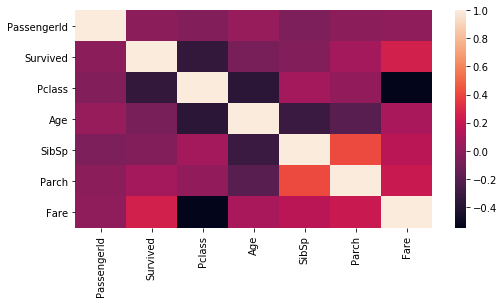

In [48]:
sbs.heatmap(cor);

### Data Manipulation - get_dummies() : We know that Algorithms cannot handle str or text data. So each variable should be converted into a integer. Before that lets see what kind of categorical variables exists
1. __Nominal Variable__: These variables have values(string values) which are not related to each other. Say if we denote Men=1 and Women=2 and Children=3, then there is no relation like 1+2 = 3 or order like 1<2<3 (which would mean men<women<children) . And we want the algorithm to make sure it does not assume this kind of relation. So we cannot denote by integers. So we use what is called as 1 hot encoding.
2. __Ordinal Variable__: These variables have a order/relation amoung the values. Say ex. high, medium, low if we denote by 1, 2, 3. Then for sure hihg(1) > medium(2) > low(3).  We use Lable Encoding to convert these values. Label encoding assigns each unique value to a different integer
<img src="images/image58.png" align = "middle" style="width:500px; height:200px;"/>   
3. __One hot Encoding__: Here we create one columnn for each of the value in the Nominal Variable. One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. We use OHE from sklearn to get teh job done.
    * We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
    * setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).
4. __get_dummies__ : Also does the same job of encoding but OHE has better parameters and perfor better in production.


In [49]:
dct={
    'name':['Veena', 'amit', 'seema'],
    'age': [32, 35, 40],
    'sex': ['female', 'male', 'female'],
    'interest': ['cooking', 'sports', 'dancing']
}
df = pd.DataFrame(dct)

In [50]:
# in big df's use this to find the coumns which has text fields.
s = (df.dtypes == 'object')
s[s].index  

Index(['name', 'sex', 'interest'], dtype='object')

In [51]:
# Label Encoding is a class so define it first
label_encoder = LabelEncoder()
df['LE'] = label_encoder.fit_transform(df['sex'])
df

,name,age,sex,interest,LE
0,Veena,32,female,cooking,0
1,amit,35,male,sports,1
2,seema,40,female,dancing,0


In [52]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH = OH_encoder.fit_transform(df[['sex']]) # This gives a ndarray of (3,2) with two columns one for male one for female
print(OH, OH.shape) 
# Convert it to a df
OH_df = pd.DataFrame(OH,columns=['OHE_F', 'OHE_M'])
OH_df.index = df.index # One-hot encoding removed index; put it back 
print(OH_df)
df = pd.concat([df, OH_df], axis='columns')
df

[[1. 0.]
 [0. 1.]
 [1. 0.]] (3, 2)
   OHE_F  OHE_M
0    1.0    0.0
1    0.0    1.0
2    1.0    0.0


,name,age,sex,interest,LE,OHE_F,OHE_M
0,Veena,32,female,cooking,0,1.0,0.0
1,amit,35,male,sports,1,0.0,1.0
2,seema,40,female,dancing,0,1.0,0.0


In [53]:
dummies_sex = pd.get_dummies(df[['sex', 'interest']])
dummies_sex # then add this df to the original df
df = pd.concat([df, dummies_sex], axis='columns')
df

,name,age,sex,interest,LE,OHE_F,OHE_M,sex_female,sex_male,interest_cooking,interest_dancing,interest_sports
0,Veena,32,female,cooking,0,1.0,0.0,1,0,1,0,0
1,amit,35,male,sports,1,0.0,1.0,0,1,0,0,1
2,seema,40,female,dancing,0,1.0,0.0,1,0,0,1,0


In [54]:
# note that its very important in ML Algorithms to not have duplicate variables conveying the same information
# That will result into multicollinearity issue. So two of the variables out of the three 'se', 'female', 'male'
# convey the same information. We cannot keep 'sex' as its str and so we can delete 'sex' and 'male'/'female'
df.drop(columns = ['sex', 'sex_male', 'interest', 'interest_cooking'], inplace=True)

### Linear Regression

In [55]:
X, y = datasets.load_boston(return_X_y=True) # boston housing price dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
regression = LinearRegression()
regression.fit(X_train, y_train)
pred = regression.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, pred))
RMSE

4.4922900142358175

### DecisionTreeRegressor
With the same X,y split we can see that DCRegressor always did a better job.

In [56]:
DCreg = tree.DecisionTreeRegressor(random_state=0)
DCreg.fit(X_train, y_train)
pred = DCreg.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, pred))
RMSE 

4.469818949032024

### Probabilistic Modelling:
1. A probabilistic method or model is based on the theory of probability or the fact that randomness plays a role in predicting future events.
2. Read notes on Probability and Statistics before proceding further.

### Naive Bayes Classifiers:
1. In machine learning, naïve Bayes classifiers are a family of simple __"probabilistic classifiers"__ based on applying Bayes' theorem with strong (naïve) __independence__ assumptions between the features. They are among the simplest Bayesian network models.
2. Naive Bayes calssifier uses Bayes Theorem:
    __P(A|B) = $\frac{P(B|A)*P(A)}{P(B)}$__
3. Different Naive Bayes' classifier:   
   * __Multi-variate Bernoulli Naive Bayes__: The binomial model is useful if your feature vectors are binary (i.e., 0s and 1s). One application would be text classification with a bag of words model where the 0s 1s are "word occurs in the document" and "word does not occur in the document".
   * __Multinomial Naive Bayes__ The multinomial naive Bayes model is typically used for discrete counts. E.g., if we have a text classification problem, we can take the idea of bernoulli trials one step further and instead of "word occurs in the document" we have "count how often word occurs in the document", you can think of it as "number of times outcome number x_i is observed over the n trials"
   * __Gaussian Naive Bayes__ Here, we assume that the features follow a normal distribution. Instead of discrete counts, we have continuous features (e.g., the popular Iris dataset where the features are sepal width, petal width, sepal length, petal length).
4. https://www.youtube.com/watch?v=Q8l0Vip5YUw

## ToDo add your Titanic notebook link here  as an example to Naive bayes

### Feature Extraction:
1. The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.
2. https://scikit-learn.org/stable/modules/feature_extraction.html

In [57]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document',
]

In [58]:
#  from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [59]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

### Simple Imputer: 
1. we use SimpleImputer to replace missing values with the some aggregate value along each column.

In [60]:
dct={
    'name':['Veena', 'amit', 'seema', 'ranju'],
    'age': [32, 35, 40, 50],
    'sex': ['female', 'male', 'female', 'male'],
    'height': [np.nan, 5.6, 5.6, 5.0],
    'weight': [116, 160, 134, np.nan]
}
df = pd.DataFrame(dct)
df

,name,age,sex,height,weight
0,Veena,32,female,NaN,116.0
1,amit,35,male,5.6,160.0
2,seema,40,female,5.6,134.0
3,ranju,50,male,5.0,NaN


In [61]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(df[['height']])

array([[5.4],
       [5.6],
       [5.6],
       [5. ]])

In [62]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
imp_mean.fit_transform(df[['height']])

array([[0. ],
       [5.6],
       [5.6],
       [5. ]])

### ColumnTransformer:
1. Similar to how a pipeline bundles together preprocessing and modeling steps, we use the ColumnTransformer class to bundle together different preprocessing steps. The code below:
    * imputes missing values in numerical data, and
    * imputes missing values and applies a one-hot encoding to categorical data.

In [63]:
# this applies simpleimputer to columns 1,3,4 and OHE to 2
t = [('num', SimpleImputer(strategy='mean'), [1,3,4]), ('cat', OneHotEncoder(), [2])]
# Any columns not specified in the list of transformers are dropped from the dataset by default; 
# this can be changed by setting the remainder argument.
transformer = ColumnTransformer(t, remainder='passthrough')
#The order of the columns in the transformed feature matrix follows the order of how the columns are 
# specified in the transformers list. 
t_df = transformer.fit_transform(df) # this gives a array
# https://stackoverflow.com/questions/54592115/appending-the-columntransformer-result-to-the-original-data-within-a-pipeline
pd.DataFrame(t_df)

,0,1,2,3,4,5
0,32,5.4,116,1,0,Veena
1,35,5.6,160,0,1,amit
2,40,5.6,134,1,0,seema
3,50,5,136.667,0,1,ranju


### Pipeline :
1. 

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [65]:
# we will use titanic data to show piplelining
df = tnic_df
print(df.columns)
df = df.drop(['PassengerId', 'Parch', 'Ticket', 'Fare'], axis='columns') # lets take few columns for analysis
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Cabin',
       'Embarked'],
      dtype='object')

In [66]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Cabin        object
Embarked     object
dtype: object

In [67]:
# sepearte Target
y = df['Survived']
X = df.drop(['Survived'], axis='columns')

In [68]:
# divide into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
#seperate the categorical and numerical data
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype =='object']
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print(categorical_cols, numerical_cols)

['Name', 'Sex', 'Cabin', 'Embarked'] ['Pclass', 'Age', 'SibSp']


In [70]:
# Step 1: Define Preprocessing Step
# impute missing values in numerical and  impute+OHE in categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [71]:
# Bundle then into Preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

In [72]:
# Step 2:Define the Model
model = GradientBoostingClassifier()

In [73]:
# step 3: Create and Evaluvate the Pipeline
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [74]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train);

In [75]:
# Preprocessing of test data, get predictions
# see how all the preprocessing is done in a simple way using pieline
preds = my_pipeline.predict(X_test)

In [76]:
# Evaluate the model
score = accuracy_score(y_test, preds)
score

0.8134328358208955

Lets see how ???

In [77]:
data = X_train[['Name', 'Sex', 'Cabin', 'Embarked']]
print(data.shape)
# print(init.head(5))
print(data['Embarked'].isnull().value_counts())
print('***************************************')
imp = SimpleImputer(strategy='most_frequent')
imp_data = imp.fit_transform(data)
print(imp_data.shape)
# imp_data[:,3]

(623, 4)
False    622
True       1
Name: Embarked, dtype: int64
***************************************
(623, 4)


In [78]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_data = OHE.fit_transform(imp_data)
OHE_data.shape

(623, 734)

In [79]:
# Lets include the name column
data = X_train[['Name', 'Sex', 'Cabin', 'Embarked']]
print("Before", data.shape)
imp_data = imp.fit_transform(data)
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_data = OHE.fit_transform(imp_data)
print(OHE_data.shape) # see how 700ish columns are added each name is OHencoded. Which is not good

Before (623, 4)
(623, 734)


In [80]:
data = X_train[['Sex', 'Cabin', 'Embarked']]
print("Before", data.shape)
imp_data = imp.fit_transform(data)
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_data = OHE.fit_transform(imp_data)
print(OHE_data.shape) # 2(sex)+106(cabin)+3(Embarked) = 111

Before (623, 3)
(623, 111)


### Ensemble Learning -  Bagging  and Boosting:
1. One of the big disadvantage of decision tree classfier is that these kind of classifier works great with the data (training data) used to create them, but they are not flexible when it comes to classifying new samples. So we go with Ensemble Classifier.
3. Ensemble Learning: Here we use multiple learning algorithm at the same time to increase accuracy. We can also use same algorithm different many times to get a ensemble model (Random forest classification). Ensemble method gives better accuracy, Higher consistncy(avoids overfitting) and also reduces bias-variace error. You decide on using the ensemble model if you find that the results of ensemble model(compared to single model) is worth the extra training. We can use ensemble model on classification and regression model.
<img src="images/image60.png" align = "middle" style="width:400px; height:150px;"/>
2. BootStrap aggregating or Bagging: It is one of the ensemble method. Here Multiple  models of learning algorithms are trained with subsets of DataSet Randomly picked  from the Training dataset.
<img src="images/image61.png" align = "middle" style="width600px; height:250px;"/>
3. Boosting: The approach is same as Bagging with little difference. In here we train a model with subset of training dataset and test the model using testing dataset. Then based on the results we will train the model again with subset of training dataset , but this time it includes each datapoint of the testing dataset with wrong predictions.
<img src="images/image62.png" align = "middle" style="width600px; height:250px;"/>

### RandomForestClassifier:
1. This is one of the Ensemble Classifier. Random forest combines the simplicity of decision tree with flexibity that results in vast improvement in accuracy.
2. 
